<a href="https://colab.research.google.com/github/mitwnkl/coffee_classification/blob/main/project_with_a_million_questions_and_zero_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсова робота

Тема: Походження кавового зерна

Тип задачі: класифікація

Виконав: Алейніков О.В.

В якості свого курсового проекту я вибрав задачу класифікації. В даному ноутбуці я спробую класифікувати країну походження кавового зерна базуючись на його характеристиках

Датасет: https://www.kaggle.com/datasets/ankurchavda/coffee-beans-reviews-by-coffee-quality-institute?select=Coffee-modified.csv

In [ ]:
# підключення до гугл диска на якому зберігаються дані
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Бібліотеки для обробки та візуалізації даних
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/r_d/project/coffee_beans.csv", index_col="ID")
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
ID,,,,,,,,,,,,,,,,,,,,,
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1319 non-null   object 
 1   Owner                  1310 non-null   object 
 2   Country.of.Origin      1316 non-null   object 
 3   Farm.Name              961 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1007 non-null   object 
 6   ICO.Number             1169 non-null   object 
 7   Company                1105 non-null   object 
 8   Altitude               1092 non-null   object 
 9   Region                 1257 non-null   object 
 10  Producer               1084 non-null   object 
 11  Number.of.Bags         1314 non-null   object 
 12  Bag.Weight             1314 non-null   object 
 13  In.Country.Partner     1314 non-null   object 
 14  Harvest.Year           1266 non-null   object 
 15  Grading.D

## Чистка та аналіз даних

Датасет невеликий, але має велику кількість атрибутів, більшість з яких взагалі не потрібні. 

Задача: визначити країну походження кавового зерна.

Цільова змінна: Country.of.Origin

Залишилось вибрати змінні-передбачувачі, по яким модель буде визначати країну. Ці змінні мають бути зв'язаними напряму з зерном та кавою як напоєм з цього зерна, і не зв'язаними з географічними чинниками як місцезнаходження ферми, висота ферми, або ж постачальниками і так далі

Керуючись логікою я вибрав "Aroma", "Flavor", "Aftertaste", "Acidity", "Sweetness", "Body", "Moisture"

*   Aroma - насиченість аромату (від 1.0 до 10.0)
*   Flavor - насиченість смаку (від 1.0 до 10.0)
*   Aftertaste - насиченість післясмаку (оцінка від 1.0 до 10.0)
*   Acidity - міра кислотності (оцінка від 1.0 до 10.0)
*   Sweetness - міра солодкісті (оцінка від 1.0 до 10.0)
*   Body - розмір зерна (мм)
*   Moisture - вологість зерна (% виражений від 0.0 до 1.0)

Всі інші можна видалити

In [ ]:
target = "Country.of.Origin"
predictors = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Sweetness", "Body", "Moisture"]

df = df[predictors + [target]]
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
ID,,,,,,,,
1,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
2,8.75,8.67,8.5,8.58,10.0,8.42,0.12,Ethiopia
3,8.42,8.5,8.42,8.42,10.0,8.33,0,Guatemala
4,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
5,8.25,8.5,8.25,8.5,10.0,8.42,0.12,Ethiopia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1312
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1311 non-null   object 
 1   Flavor             1309 non-null   object 
 2   Aftertaste         1309 non-null   object 
 3   Acidity            1309 non-null   object 
 4   Sweetness          1308 non-null   float64
 5   Body               1309 non-null   float64
 6   Moisture           1308 non-null   object 
 7   Country.of.Origin  1316 non-null   object 
dtypes: float64(2), object(6)
memory usage: 92.7+ KB


In [ ]:
# Маємо 1319 записів, але при цьому індекси від 1 до 1312, вони не дуже важливі, але я краще оновлю їх
df = df.reset_index(drop=True)
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
0,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
1,8.75,8.67,8.5,8.58,10.0,8.42,0.12,Ethiopia
2,8.42,8.5,8.42,8.42,10.0,8.33,0,Guatemala
3,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
4,8.25,8.5,8.25,8.5,10.0,8.42,0.12,Ethiopia


Оскільки це supervised learning задача то спочатку треба перевірити пропущенні значення цільової змінної, якщо вони є оскільки без них не вийде створити нормальну програму

In [ ]:
df[df[target].isna()]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,6.75,6.75,6.42,6.83,10.0,7.58,0.1,NaN


Таких значень 3, 2 з яких є повністю пропущенними їх точно видаляємо, але одне з них має заповені усі цільові змінні, можна спробувати відновити країну базуючись на цих значеннях

**Наприклад відсортувавши усі значення по цільовим змінним і заповнивши пропущенне значення методом bfill / ffill (Ідея в тому що коли значення будуть відсортовані, то біля рядка з пропущенними значеннями буде знаходитись рядок з найбільш схожими даними на той в якому пропущено країну, звідки можна взяти назву країни)**

In [ ]:
# спочатку видалення 
df = df.drop([1087, 1088])

# заміна 
df[target] = df.sort_values(predictors)[target].fillna(method="ffill")
print(df.loc[1204], "\n") # рядок в який було вписано назву країни

df[df[target].isna()]

Aroma                 6.75
Flavor                6.75
Aftertaste            6.42
Acidity               6.83
Sweetness             10.0
Body                  7.58
Moisture               0.1
Country.of.Origin    Haiti
Name: 1204, dtype: object 



,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin


In [ ]:
# з пропущенними значеннями завершили, тепер треба подивитись чи всі записи є країнами чи може тут є сюрпризи
df[target].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       '7.42', 'Natural / Dry',
       '0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660', 'Mauritius', '7.25',
       'm', 'Cote d?Ivoire', 'India', 'oriente'], dtype=object)

В ознаці є декілька незрозумілих записів в яких не записана конкретна країна ('oriente' - 'схід' іспанською, скоріш за все позначає країни центрального сходу).
Оскільки це цільова ознака і задача яку я вирішую це задача з учителем, то не маючи назви країни все інше не має сенсу, тому на мою думку ці рядки треба видалити  

In [ ]:
df[df["Country.of.Origin"].isin(["7.42", "Natural / Dry", "0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660", "7.25", "m", "oriente"])]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
920,Specialty Coffee Association,d3ed2a8c1db69c87daef88f425dd0e8ef3216a39,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,900.00,NaN,7.42
963,"November 15th, 2018",NaN,NaN,NaN,NaN,NaN,NaN,Natural / Dry
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660
1089,Blossom Valley International,NaN,NaN,NaN,NaN,NaN,NaN,7.25
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m
1292,10,10,6.42,74.75,10.0,0.11,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,oriente


Ці записи виявились жахливими, ніякої корисної інформації, на перший погляд наче рядок 1292 є нормальним, але oriente позначає цілий список країн, та й цей рядок має викид в колонці Acidity та пропущенний Moisture, це можна видаляти

In [ ]:
df = df[~df["Country.of.Origin"].isin(["7.42", "Natural / Dry", "0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660", "7.25", "m", "oriente"])]

# косметична зміна назв країн
df = df.replace({"Country.of.Origin":{"Tanzania, United Republic Of": "Tanzania",
                                      "Cote d?Ivoire": "Cote d`Ivoire",
                                      "United States (Hawaii)": "Hawaii",
                                      "United States (Puerto Rico)": "Puerto Rico"}})

df["Country.of.Origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'Hawaii', 'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda',
       'Honduras', 'Taiwan', 'Nicaragua', 'Tanzania', 'Kenya', 'Thailand',
       'Colombia', 'Panama', 'Papua New Guinea', 'El Salvador', 'Japan',
       'Ecuador', 'Puerto Rico', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d`Ivoire', 'India'], dtype=object)

З цільовою змінною розібрались, тепер змінні-передбачувачі, як було показано раніше типи даних не сходяться, очевидно що усі змінні мають бути типу float, але деякі з них чомусь object, треба подивитись чому так, виправити помилки і потім змінити їх тип на float

In [ ]:
# Перевірка змінних-передбачувачів на аномальні значення (та додатково розподіл)
for pred in predictors:
    print(df[pred].value_counts().sort_index(ascending=False), '\n==============================\n')

8.75      1
8.67      2
8.58      1
8.5       3
8.42      9
8.33      6
8.25      9
8.17     20
8.08     20
8        43
7.92     57
7.83    101
7.81      2
7.75    122
7.67    173
7.58    149
7.5     162
7.42    120
7.33     96
7.25     77
7.17     45
7.08     28
7        23
6.92     14
6.83      9
6.75      5
6.67      3
6.5       2
6.42      1
6.33      1
6.17      1
5.08      1
0         1
Name: Aroma, dtype: int64 

8.83      1
8.67      4
8.58      2
8.5       5
8.42      5
8.33      5
8.25      7
8.17     18
8.08     13
8        41
7.92     42
7.88      2
7.83     85
7.81      1
7.75    120
7.67    145
7.58    161
7.5     164
7.42    114
7.33    109
7.25     63
7.17     56
7.08     42
7        36
6.92     15
6.83     16
6.75     10
6.67      3
6.58      5
6.5       9
6.42      1
6.33      3
6.17      2
6.08      1
0         1
Name: Flavor, dtype: int64 

8.67      1
8.58      2
8.5       4
8.42      3
8.33      2
8.25      4
8.17      7
8.08      7
8        27
7.92     19
7.88   

Схоже що всі текстові та проблемні дані в цих змінних видалились під час очистки цільової змінної, можна міняти тип

In [ ]:
df[predictors] = df[predictors].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1307 non-null   float64
 1   Flavor             1307 non-null   float64
 2   Aftertaste         1307 non-null   float64
 3   Acidity            1307 non-null   float64
 4   Sweetness          1307 non-null   float64
 5   Body               1307 non-null   float64
 6   Moisture           1307 non-null   float64
 7   Country.of.Origin  1311 non-null   object 
dtypes: float64(7), object(1)
memory usage: 92.2+ KB


Перед тим як подивитись пропущенні значення, мою увагу привернуло значення 0 в усіх змінних окрім Moisture, воно всюди дорівнює одиниці, можливо це рядок повністю пропущених даних, треба подивитись на нього

In [ ]:
df[df["Aroma"] == 0]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.12,Honduras


Моя здогадка справдилась, я сумніваюсь що при відносно середньому (дивлячись на кількість значень в колонці Moisture) значенні вологості певне зерно матиме оцінку 0 балів по всім параметрам, я думаю ці значення просто не були вписані, та їх треба перетворити на NaN

In [ ]:
df.loc[1318] = df.loc[1318].replace(0, np.nan)

df.loc[1318]

Aroma                     NaN
Flavor                    NaN
Aftertaste                NaN
Acidity                   NaN
Sweetness                 NaN
Body                      NaN
Moisture                 0.12
Country.of.Origin    Honduras
Name: 1318, dtype: object

In [ ]:
# Пропущенні значення
df[predictors].isna().sum()

Aroma         5
Flavor        5
Aftertaste    5
Acidity       5
Sweetness     5
Body          5
Moisture      4
dtype: int64

Дивно, в усіх змінних однакова кількість пропущенних значень, (враховуючи що в рядку 1318 нулі були замінено на NaN) можливо це знову одні й ті самі значення, треба на це подивитись, можливо це повністю пропущенні рядки

In [ ]:
df[df["Aroma"].isna()]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taiwan
962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
1086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taiwan
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guatemala
1318,NaN,NaN,NaN,NaN,NaN,NaN,0.12,Honduras


Так, це виявились цілі рядки пропущенних значень. Їх звісно можна видалити, але знаючи країну та маючи дані по країнам, ці пропущенні значення можна замінити середніми даними по країні, оскільки дані не мають викидів (що в будь-якому разі призведе до видалення як мінімум одного продубльованого значення бо тут 2 Тайваня, але датасет маленький і треба спробувати витягнути з нього максимум, тож я вирішив ці значення замінити)

In [ ]:
nan_ids = df[df["Aroma"].isna()].index

# заміна пропущенних значень медіанами визначеними на
for var in predictors:
    df[var] = df.groupby(target)[var].transform(lambda x: x.fillna(round(x.mean(), 2)))

df.loc[nan_ids]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
919,7.54,7.47,7.39,7.42,9.97,7.45,0.08,Taiwan
962,7.55,7.57,7.44,7.51,9.95,7.54,0.08,Brazil
1086,7.54,7.47,7.39,7.42,9.97,7.45,0.08,Taiwan
1291,7.55,7.49,7.27,7.60,9.87,7.48,0.10,Guatemala
1318,7.43,7.37,7.20,7.37,9.85,7.38,0.12,Honduras


In [ ]:
del(nan_ids)

Ну наче все що можна вже зроблено. Тепер залишилась перевірка на дублікати і в цілому можна буде дивитись на розподіл цільової змінної та починати підбирати модель

In [ ]:
# перевірка на дублікати
df.duplicated().sum()

11

In [ ]:
# дублікати є, і навіть не один, треба подивитись на них
df[df.duplicated()]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
388,7.67,7.75,7.50,7.83,10.00,7.58,0.10,Guatemala
459,7.67,7.67,7.50,7.67,10.00,7.50,0.11,Honduras
523,7.67,7.58,7.58,7.58,10.00,7.67,0.11,Colombia
721,7.50,7.50,7.50,7.50,10.00,7.50,0.11,Taiwan
742,7.50,7.50,7.50,7.50,10.00,7.50,0.11,Taiwan
769,7.50,7.50,7.50,7.50,10.00,7.50,0.11,Taiwan
859,7.50,7.50,7.25,7.42,10.00,7.42,0.11,Guatemala
870,7.42,7.50,7.25,7.50,10.00,7.50,0.11,Brazil
1030,7.42,7.25,7.25,7.25,10.00,7.25,0.11,Taiwan
1086,7.54,7.47,7.39,7.42,9.97,7.45,0.08,Taiwan


Ну що ж, оскільки окрім того що вони можуть сильно перенавчити модель, вони не дають нічого, їх усіх чекає одна доля - смерть

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
# функція для побудови графіків розподілу
def plot_distribution(data):
    fig, ax = plt.subplots(figsize=(20, 8))
    barplot = sns.barplot(x=data.index, y=data.values, ax=ax)
    plt.xticks(rotation=90)

    # Додавання кількості записів одразу над колонкою з країною
    for i in barplot.containers:
        barplot.bar_label(i, )

    plt.xlabel("Name")
    plt.ylabel("Count")
    plt.title("Distribution of countries")

    plt.show()

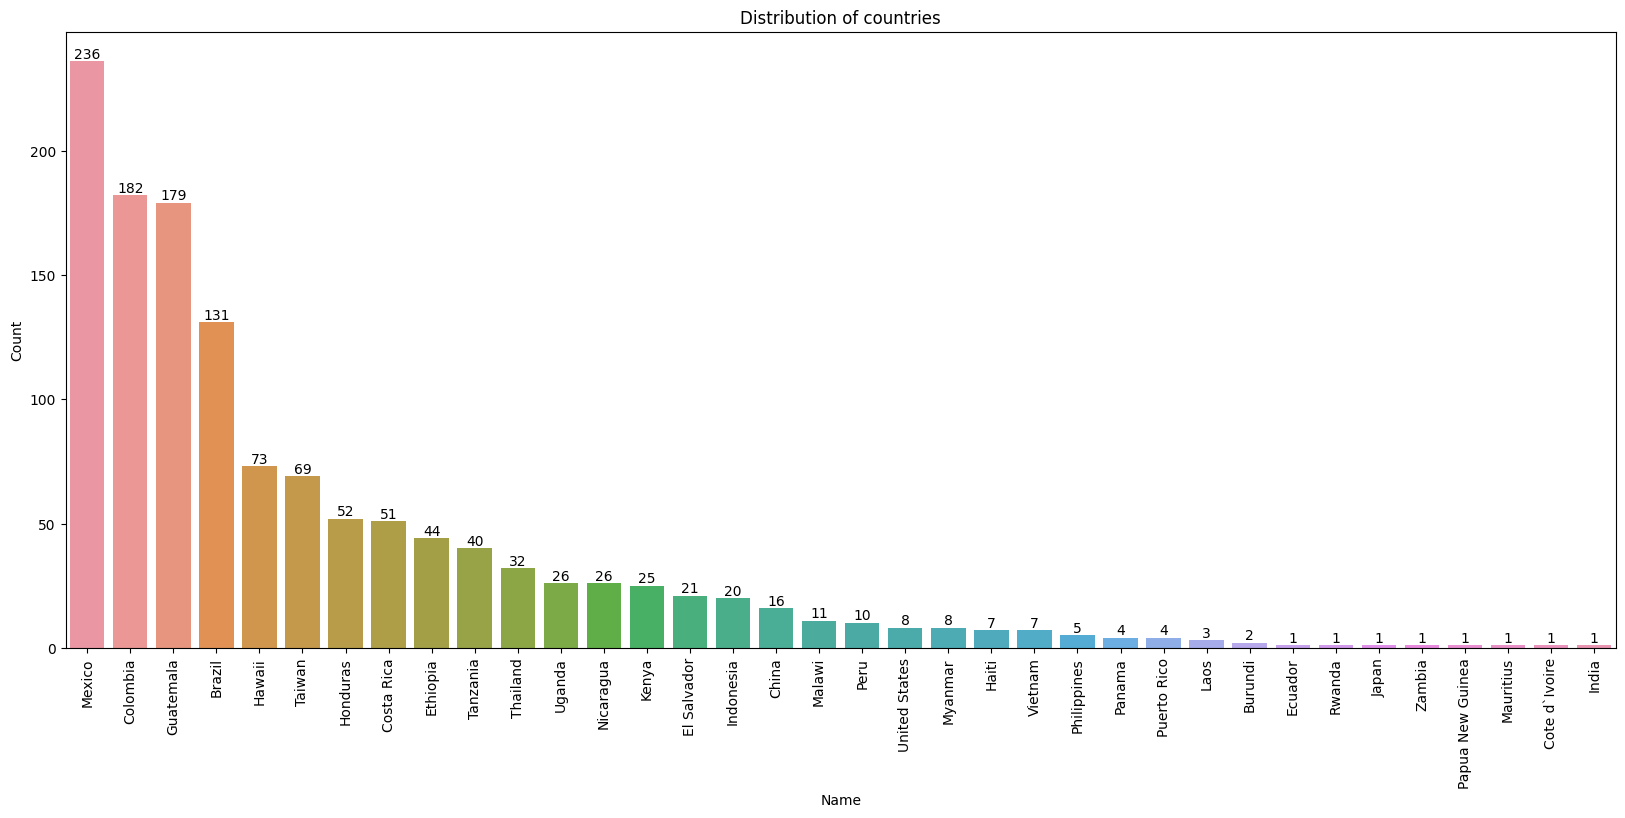

In [ ]:
# Тепер час подивитись на розподіл класів цільової змінної
countries_dist = df["Country.of.Origin"].value_counts()

plot_distribution(countries_dist)

Розподіл класів дуже сильно не рівномірний і багато класів взагалі мають занадто малу кількість даних, можна спробувати зменшити кількість класів до 10 найбільших, щоб отримати оптимальну кількість 'чистих' даних для передачі в модель

In [ ]:
# Як зміниться ситуація при 10 класаах
print(f"Класи\nВсього: {countries_dist.size}")
print(f"Залишиться: {10}")
print(f"Видалиться: {countries_dist.size - 10}\n")
print(f"Рядки даних\nВсього: {countries_dist.sum()}")
print(f"Залишиться: {countries_dist[:10].sum()}")
print(f"Видалиться: {countries_dist.sum() - countries_dist[:10].sum()}")

Класи
Всього: 36
Залишиться: 10
Видалиться: 26

Рядки даних
Всього: 1300
Залишиться: 1057
Видалиться: 243


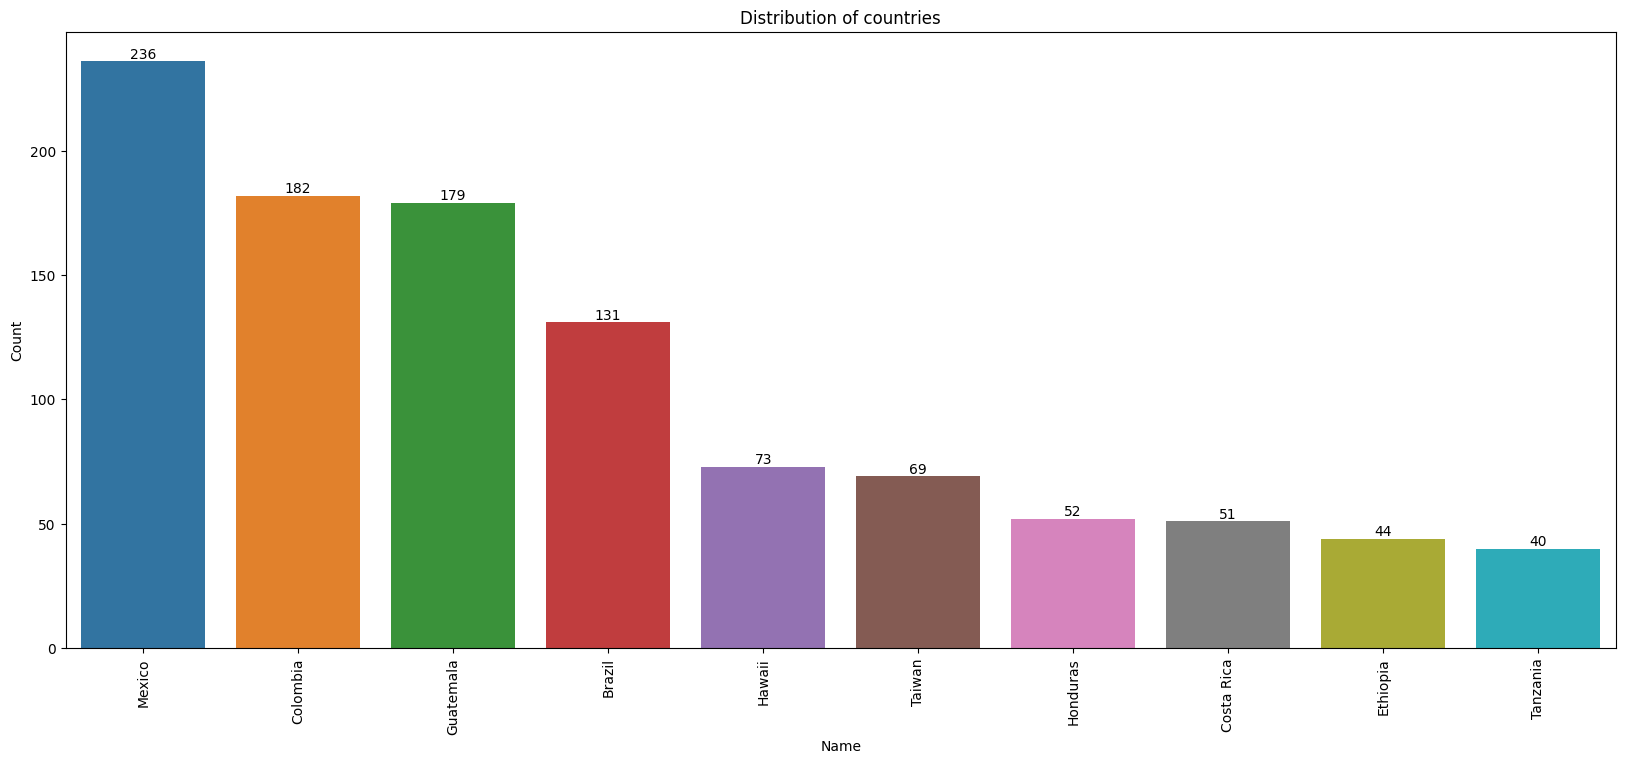

In [ ]:
# потенційний розподіл
plot_distribution(countries_dist[:10])

Розподіл все ще і близько не є збалансованим, найбільш і найменш повторювані класи відрізняються майже в 6 разів. При видаленні таких значень втратиться ~19% записів, і велика частина класів, хоча враховуючи що більшість класів лише заважають, то ця жертва може окупитись

In [ ]:
df = df[df[target].isin(countries_dist[:10].index)]

# знову оновлю індекси
df = df.reset_index(drop=True)
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
0,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
1,8.75,8.67,8.50,8.58,10.0,8.42,0.12,Ethiopia
2,8.42,8.50,8.42,8.42,10.0,8.33,0.00,Guatemala
3,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
4,8.25,8.50,8.25,8.50,10.0,8.42,0.12,Ethiopia


In [ ]:
for var in predictors:
    print(var, df[var].value_counts().size)

Aroma 35
Flavor 38
Aftertaste 36
Acidity 31
Sweetness 11
Body 31
Moisture 22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1057 non-null   float64
 1   Flavor             1057 non-null   float64
 2   Aftertaste         1057 non-null   float64
 3   Acidity            1057 non-null   float64
 4   Sweetness          1057 non-null   float64
 5   Body               1057 non-null   float64
 6   Moisture           1057 non-null   float64
 7   Country.of.Origin  1057 non-null   object 
dtypes: float64(7), object(1)
memory usage: 66.2+ KB


Підготовка даних завершена, тепер настав час створити модель.

## Створення моделей

Оскільки я не визначився з типом моделі на початку цієї роботи, я думаю використати декілька моделей щоб подивитись яка покаже кращий результат. Враховуючи що дані є дуже незбалансованими, я вибрав наступні моделі:

Decision Tree, Random Forest та SVM

In [ ]:
# Бібліотеки для побудови, підбору гіперпараметрів та оцінки успішності роботи моделей
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# Змінні-передбачувачі та цільова змінна
X = df[predictors]
y = df[target]

### Модель 1. Дерево рішень

Оскільки я ще зелений і дурний, то одразу зрозуміти які гіперпараметри ставити в дереві рішень я не можу. Потрібно створити GridSearch для підбору гіперпараметрів таких як max_depth або ж min_samples_split.

Враховуючи те що GridSearchCV сам проводить крос валідацію, то можна не розбивати дані на валідаційну вибірку, бо вона буде сама створюватись з тренувальних даних переданих в модель

In [ ]:
# розбиття даних на 80% тренувальних, в яких одразу буде проводитись валідація і 20% тестових
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)

In [ ]:
# функція для тюнингу гіперпараметрів моделей
def get_best_model(model, params, x, y, n_iter=200):
    model_search = RandomizedSearchCV(model, cv=5, n_iter=n_iter,
                                     param_distributions=params,
                                     verbose=True,
                                     random_state=13)
              
    model_search.fit(x, y)
    
    return model_search.best_estimator_

In [ ]:
# гіперпараметри для підбору
params = {
    "max_depth": range(2, 16), # глибина дерева
    "min_samples_split": range(2, 11), # мінімальна кількість записів для відокремлення нової гілки дерева
    "min_samples_leaf": range(2, 11) # мінімальна кількість записів для створення листка дерева
}

# дерево рішень
tree = DecisionTreeClassifier(class_weight="balanced",
                              random_state=13)

# підбір моделі
best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=8, random_state=13)

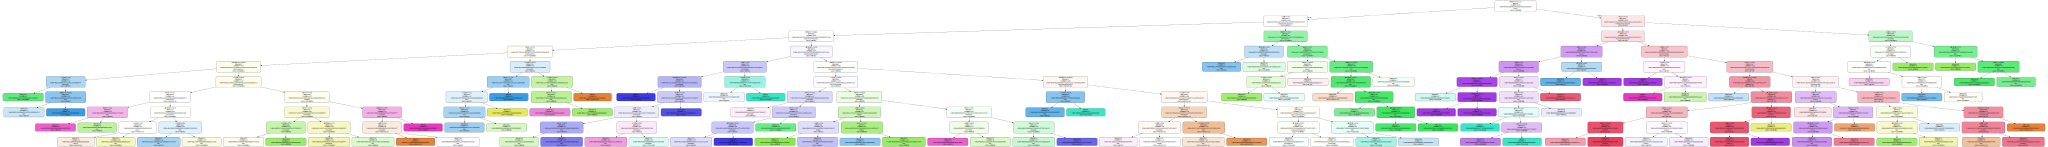

In [ ]:
# бібліотека для візуалізації дерева
import graphviz

dot_data = export_graphviz(best_tree,
                           out_file=None,
                           feature_names=X_test.columns,
                           class_names=y_test.values,
                           filled=True,
                           rounded=True)

graph = graphviz.Source(dot_data)
graph

### Корисні функції

In [ ]:
# функція для побудови матриці помилок
def plot_confusion_matrix(model, true, predicted):
    cm = confusion_matrix(true, predicted)

    fig, ax = plt.subplots(figsize=(15, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    
    disp.plot(ax=ax, text_kw={"fontsize": 14})
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)

    plt.title("Correctness of predictions", fontsize=20)
    plt.xlabel("Predicted", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.grid(False)
    plt.show()

In [ ]:
# функція для побудови матриці оцінок та візуалізації матриці помилок моделей
def get_score_and_cm(model, x, y):

    pred = model.predict(x)

    # оцінки моделі
    print(classification_report(y, pred))

    # матриця помилок
    plot_confusion_matrix(model, y, pred)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.58      0.36      0.44       105
    Colombia       0.51      0.68      0.58       145
  Costa Rica       0.44      0.68      0.53        41
    Ethiopia       0.46      0.83      0.59        35
   Guatemala       0.53      0.34      0.42       143
      Hawaii       0.49      0.66      0.56        58
    Honduras       0.31      0.69      0.43        42
      Mexico       0.83      0.40      0.54       189
      Taiwan       0.45      0.44      0.44        55
    Tanzania       0.50      0.88      0.64        32

    accuracy                           0.52       845
   macro avg       0.51      0.59      0.52       845
weighted avg       0.57      0.52      0.51       845



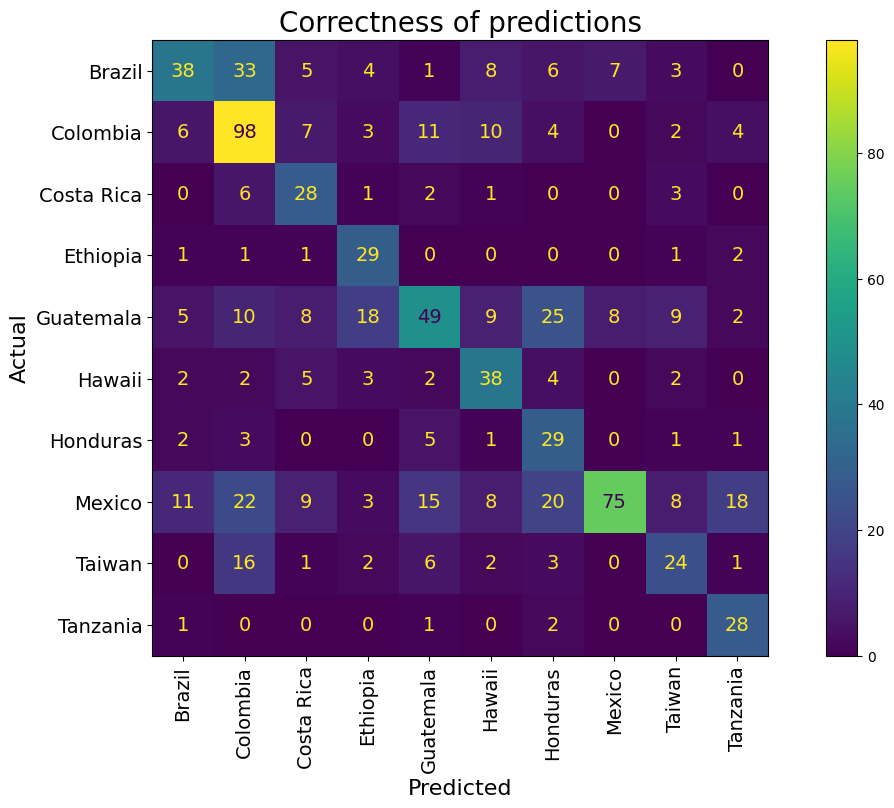

In [ ]:
get_score_and_cm(best_tree, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.20      0.08      0.11        26
    Colombia       0.43      0.49      0.46        37
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.33      0.56      0.42         9
   Guatemala       0.43      0.28      0.34        36
      Hawaii       0.14      0.20      0.16        15
    Honduras       0.13      0.40      0.20        10
      Mexico       0.41      0.19      0.26        47
      Taiwan       0.18      0.21      0.19        14
    Tanzania       0.29      0.50      0.36         8

    accuracy                           0.27       212
   macro avg       0.25      0.29      0.25       212
weighted avg       0.32      0.27      0.27       212



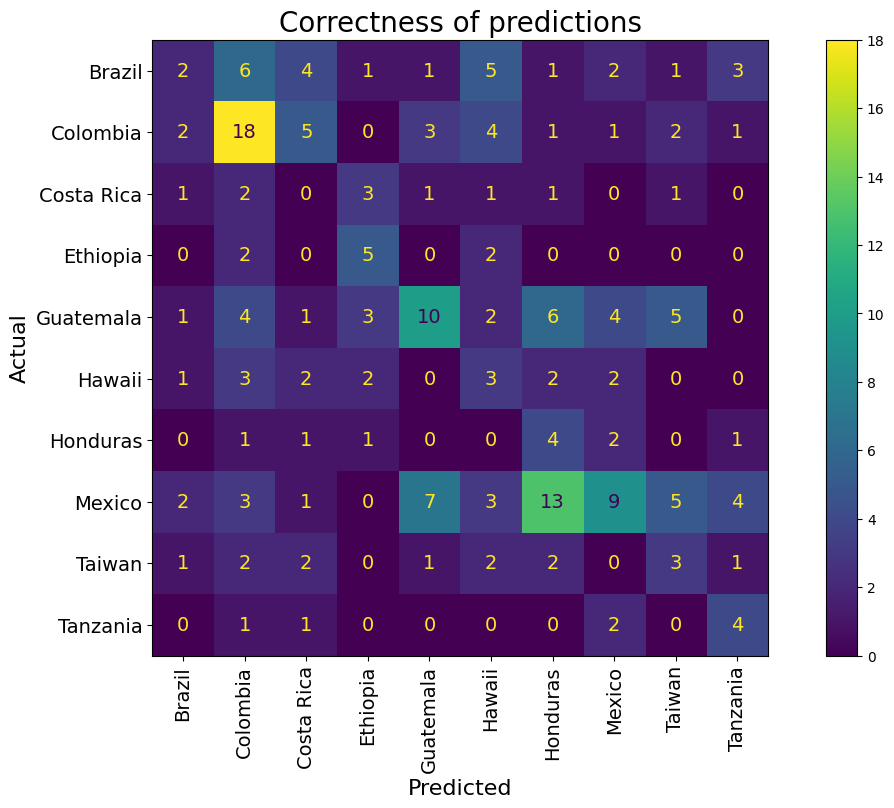

In [ ]:
get_score_and_cm(best_tree, X_test, y_test)

Модель очевидно перенавчена, показники weighted avg f1-score різняться вдвічі. 

Треба щось з цим робити

### Вибір ознак 2

Дізнавшись що ознаки які я вибирав душею і трошечки мозком створили погану модель, я вирішив подивитись на ознаки з точки зору будування моделі, чи не корелюють вони між собою і тим самим, призводять до поганої моделі. Робити я це буду за допомогою матриці кореляції використавши коефіцієнт Пірсона.

Для того щоб ефективно вибрати ознаки та не перенавчити моделі, дані потрібно валідувати, а враховуючи те що підбирати гіперпараметри дерева я збираюсь підбирати на нових даних знову й знову за допомогою GridSearch, в якому кросвалідація відбувається автоматично, то вибірки будуть поділені на 80% та 20%

In [ ]:
# функція для побудови матриц кореляції
def plot_correlation_matrix(corr_matr):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matr, annot=True, cmap="viridis")

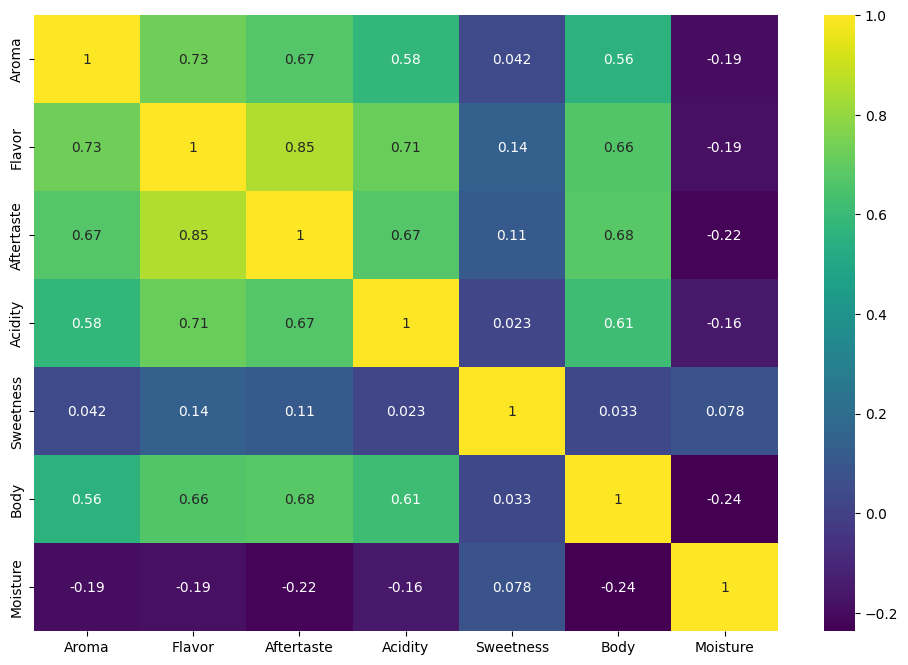

In [ ]:
# матриця кореляцій для визначення змінних для видалення
plot_correlation_matrix(X_train.corr())

З матриці кореляцій видно що змінна Flavor має високі (> 0.7) показники з усіма іншими. Також Aftertaste і Body мають показники кореляції приближені до 0.7, але якщо трошечки подумати, то смак видаляти не хочеться, через те що скоріш за все він має найбільшу кореляцію (серед барист проводяться каптести, де люди збираються і намагаються визначити на якому зерні зварена кава саме по смаку кави, підозрюю що післясмак там теж фігурує), тож ці ознаки можуть бути найважливішими. Поки що я думаю видалити лише Body щоб подивитись чи цього буде достатньо для покращення роботи моделі чи ні

#### Модель без Body

In [ ]:
# видалення Body з вибірок
X_train = X_train.drop("Body", axis=1)
X_test = X_test.drop("Body", axis=1)

# підбір моделі
best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       min_samples_leaf=2, random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.64      0.65      0.64       105
    Colombia       0.86      0.52      0.65       145
  Costa Rica       0.51      0.95      0.67        41
    Ethiopia       0.65      1.00      0.79        35
   Guatemala       0.82      0.64      0.72       143
      Hawaii       0.57      0.81      0.67        58
    Honduras       0.60      0.93      0.73        42
      Mexico       0.93      0.51      0.66       189
      Taiwan       0.48      0.87      0.62        55
    Tanzania       0.55      1.00      0.71        32

    accuracy                           0.68       845
   macro avg       0.66      0.79      0.69       845
weighted avg       0.75      0.68      0.68       845



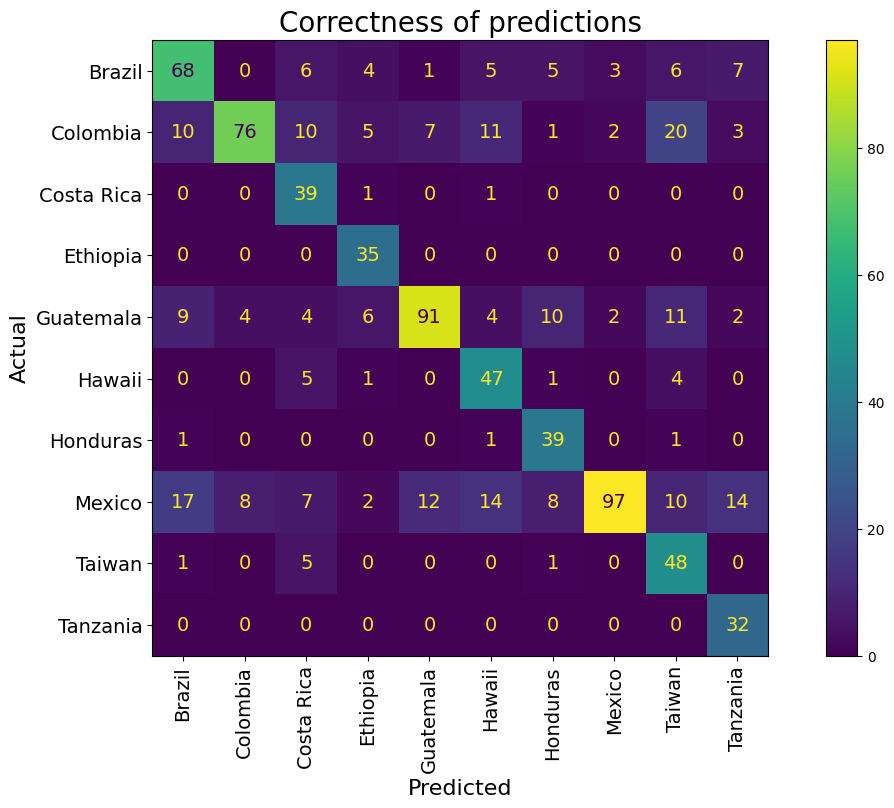

In [ ]:
get_score_and_cm(best_tree, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.27      0.15      0.20        26
    Colombia       0.47      0.24      0.32        37
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.14      0.22      0.17         9
   Guatemala       0.33      0.17      0.22        36
      Hawaii       0.10      0.13      0.11        15
    Honduras       0.06      0.10      0.07        10
      Mexico       0.42      0.30      0.35        47
      Taiwan       0.15      0.36      0.21        14
    Tanzania       0.29      0.88      0.44         8

    accuracy                           0.24       212
   macro avg       0.22      0.25      0.21       212
weighted avg       0.30      0.24      0.24       212



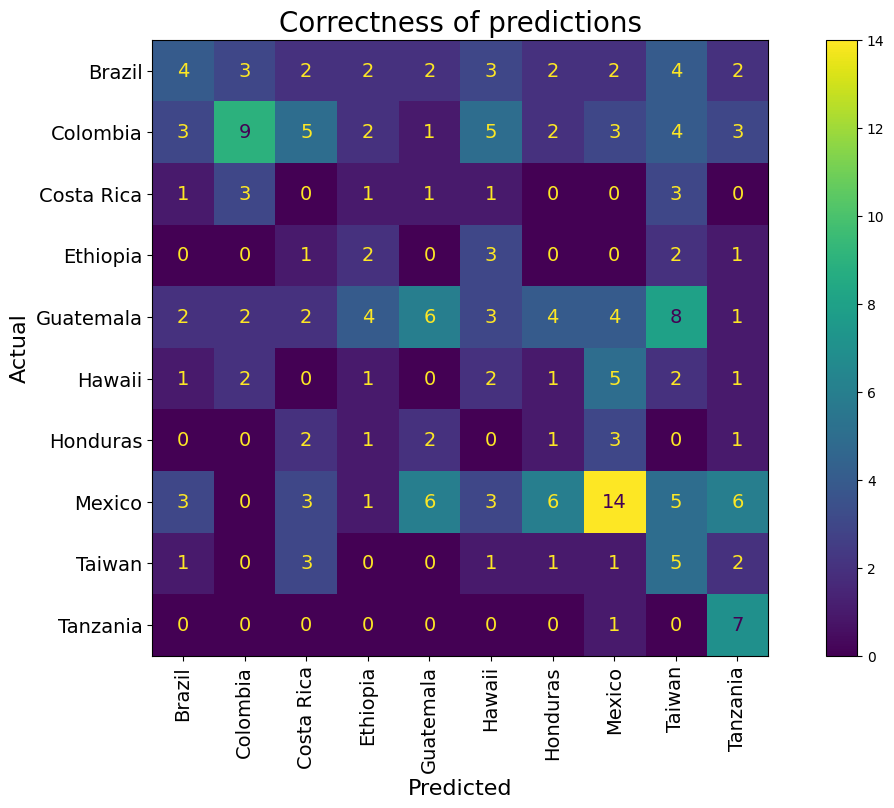

In [ ]:
get_score_and_cm(best_tree, X_test, y_test)

Оверфіт не пропав, навіть став виразніше, але те що видалення Body так підняло результативність на тренувальних даних лише доводить що ця змінна була зайва

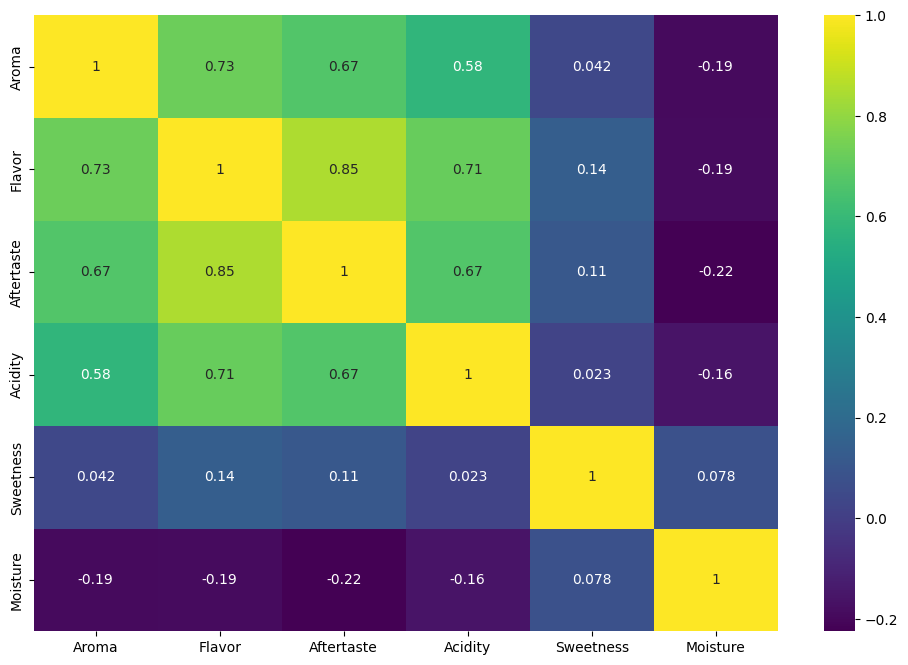

In [ ]:
plot_correlation_matrix(X_train.corr())

Аромат та Кислотність 2 нових претендента на видалення. Знову ж таки використовуючи мозок Аромат звучить як кращий показник країни, ніж кислотність напою. Тому видалю кислотність

#### Модель без Body та Acidity

In [ ]:
# видалення Acidity з вибірок в яких вже видалене Body
X_train = X_train.drop("Acidity", axis=1)
X_test = X_test.drop("Acidity", axis=1)

# підбір моделі
best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=4,
                       random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.40      0.35      0.37       105
    Colombia       0.60      0.50      0.55       145
  Costa Rica       0.27      0.34      0.30        41
    Ethiopia       0.37      0.71      0.49        35
   Guatemala       0.50      0.43      0.46       143
      Hawaii       0.35      0.50      0.41        58
    Honduras       0.31      0.67      0.42        42
      Mexico       0.71      0.39      0.50       189
      Taiwan       0.23      0.15      0.18        55
    Tanzania       0.33      0.78      0.46        32

    accuracy                           0.44       845
   macro avg       0.41      0.48      0.42       845
weighted avg       0.49      0.44      0.44       845



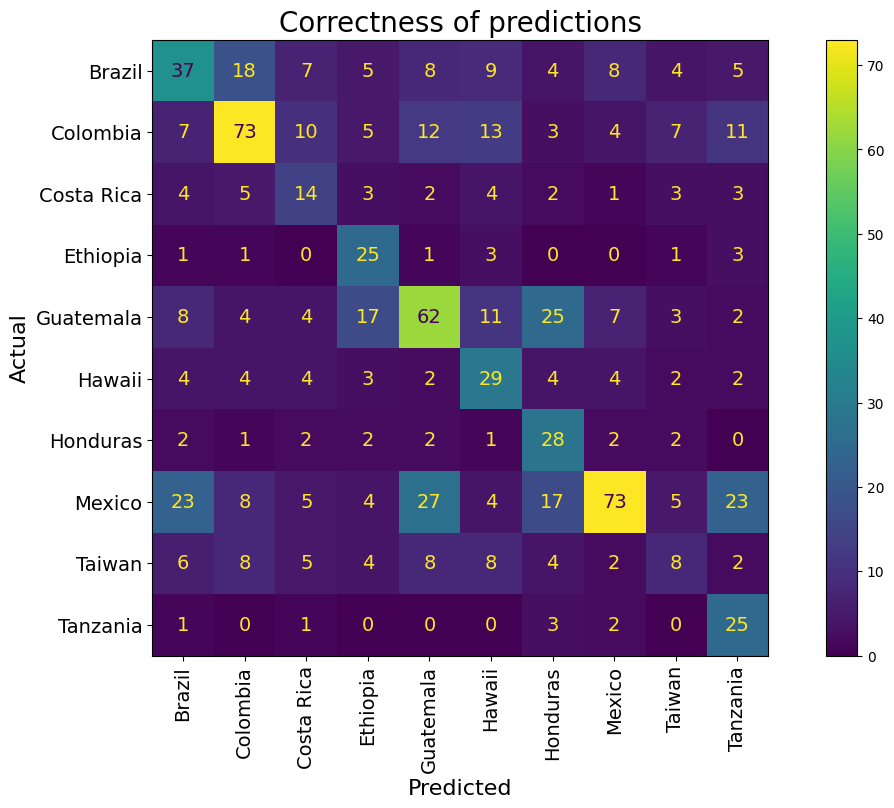

In [ ]:
get_score_and_cm(best_tree, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.07      0.04      0.05        26
    Colombia       0.47      0.41      0.43        37
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.10      0.11      0.11         9
   Guatemala       0.45      0.36      0.40        36
      Hawaii       0.16      0.33      0.21        15
    Honduras       0.10      0.20      0.13        10
      Mexico       0.47      0.30      0.36        47
      Taiwan       0.00      0.00      0.00        14
    Tanzania       0.15      0.50      0.24         8

    accuracy                           0.26       212
   macro avg       0.20      0.22      0.19       212
weighted avg       0.30      0.26      0.27       212



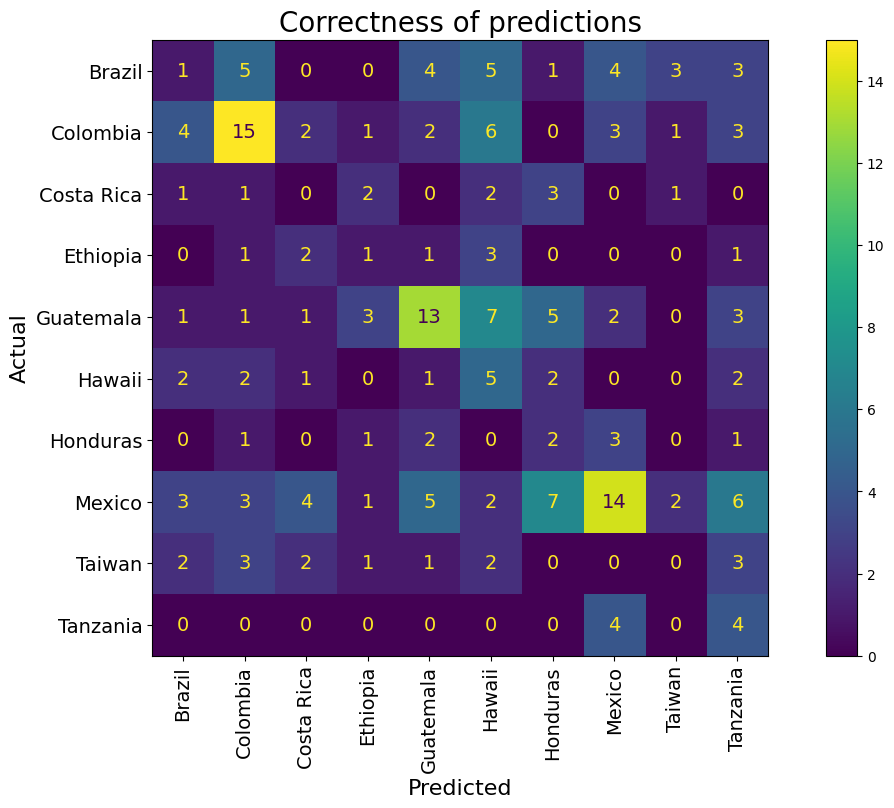

In [ ]:
get_score_and_cm(best_tree, X_test, y_test)

Видалити Acidity було поганою ідеєю, модель стала показувати гірші результати.

При цьому перенавчання нікуди не ділось, навіть перетворилось в недонавчання

### Модель 2. Випадковий ліс

Збалансоване дерево показує чітке перенавчання.
Тепер треба спробувати RandomForest збалансованих дерев і подивитись чи покаже він кращий результат

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# оновлений розподіл з усіма ознаками (такий як був на першому дереві)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

In [ ]:
# створення випадкового лісу
rfc = RandomForestClassifier(class_weight="balanced",
                             random_state=13)

# гіперпараметри для підбору кращої моделі
rfc_params = params.copy()
rfc_params["n_estimators"] = range(5, 21)

#### Модель з усіма ознаками

In [ ]:
# підбір моделі
best_rfc = get_best_model(rfc, rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=9, random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.63      0.61      0.62       105
    Colombia       0.66      0.77      0.71       145
  Costa Rica       0.64      0.78      0.70        41
    Ethiopia       0.62      0.86      0.72        35
   Guatemala       0.82      0.65      0.72       143
      Hawaii       0.75      0.71      0.73        58
    Honduras       0.49      0.83      0.62        42
      Mexico       0.83      0.56      0.67       189
      Taiwan       0.65      0.55      0.59        55
    Tanzania       0.49      0.97      0.65        32

    accuracy                           0.68       845
   macro avg       0.66      0.73      0.67       845
weighted avg       0.71      0.68      0.68       845



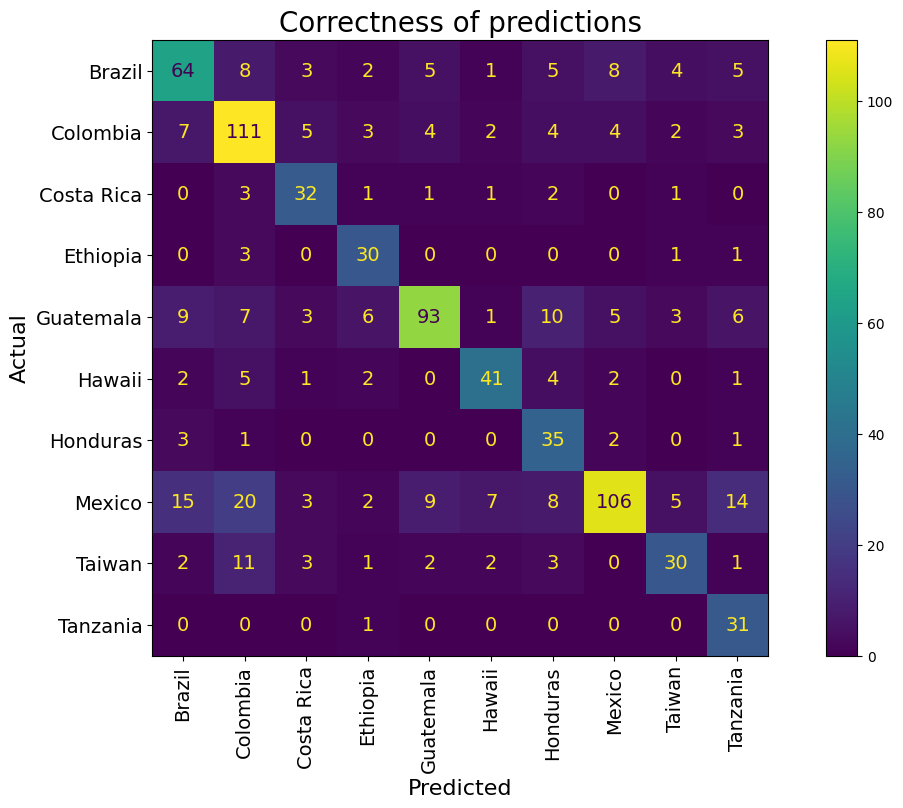

In [ ]:
get_score_and_cm(best_rfc, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.38      0.31      0.34        26
    Colombia       0.42      0.43      0.43        37
  Costa Rica       0.17      0.10      0.12        10
    Ethiopia       0.31      0.44      0.36         9
   Guatemala       0.44      0.33      0.38        36
      Hawaii       0.36      0.27      0.31        15
    Honduras       0.00      0.00      0.00        10
      Mexico       0.46      0.47      0.46        47
      Taiwan       0.17      0.14      0.15        14
    Tanzania       0.20      0.50      0.29         8

    accuracy                           0.34       212
   macro avg       0.29      0.30      0.28       212
weighted avg       0.36      0.34      0.35       212



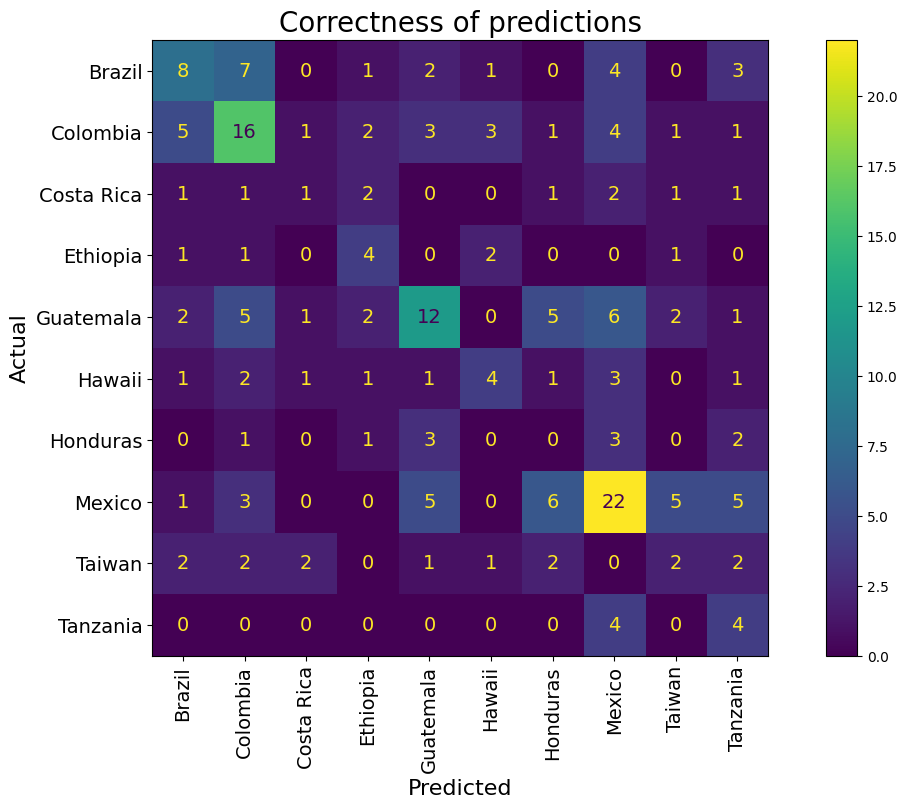

In [ ]:
get_score_and_cm(best_rfc, X_test, y_test)

#### Модель без Body

Знаючи що дерево рішень показало кращий результат без ознаки Body, а випадковий ліс це набір дерев рішень, можна спробувати натренувати ліс на даних без Body і подивитись чи це покращить результати моделі

In [ ]:
# видалення Body з вибірок
X_train = X_train.drop("Body", axis=1)
X_test = X_test.drop("Body", axis=1)

# підбір моделі
best_rfc = get_best_model(rfc, rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=9, random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.67      0.60      0.63       105
    Colombia       0.69      0.70      0.70       145
  Costa Rica       0.62      0.83      0.71        41
    Ethiopia       0.69      0.77      0.73        35
   Guatemala       0.75      0.69      0.72       143
      Hawaii       0.79      0.76      0.77        58
    Honduras       0.47      0.88      0.62        42
      Mexico       0.83      0.58      0.68       189
      Taiwan       0.63      0.60      0.62        55
    Tanzania       0.52      0.97      0.67        32

    accuracy                           0.69       845
   macro avg       0.67      0.74      0.68       845
weighted avg       0.71      0.69      0.69       845



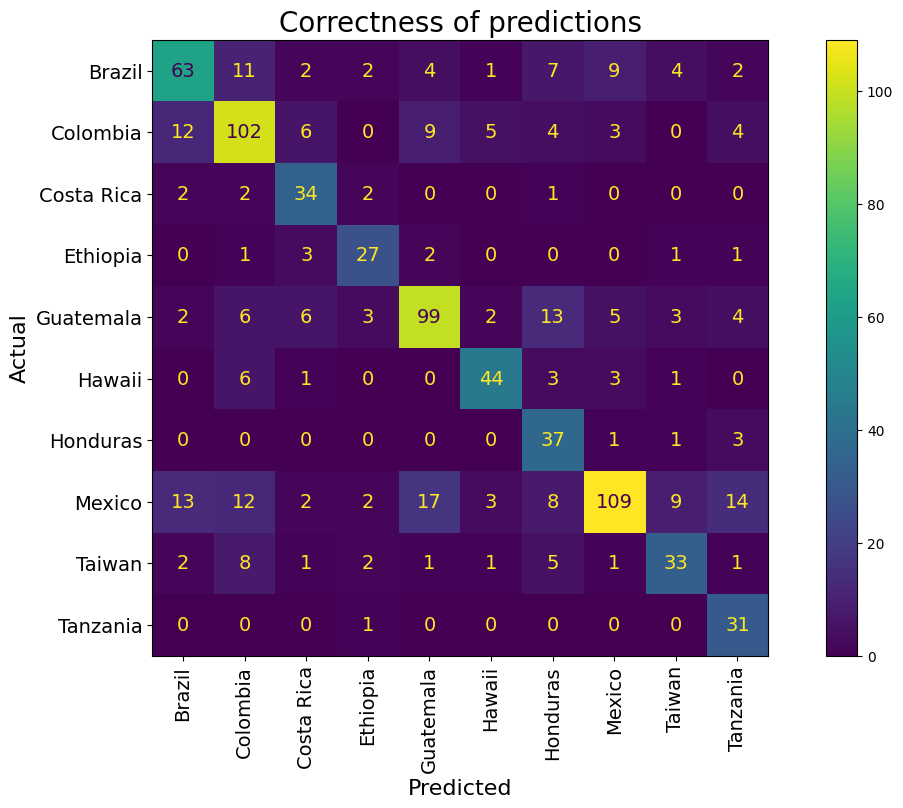

In [ ]:
get_score_and_cm(best_rfc, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.24      0.19      0.21        26
    Colombia       0.52      0.43      0.47        37
  Costa Rica       0.18      0.20      0.19        10
    Ethiopia       0.21      0.33      0.26         9
   Guatemala       0.46      0.31      0.37        36
      Hawaii       0.25      0.20      0.22        15
    Honduras       0.06      0.10      0.08        10
      Mexico       0.40      0.36      0.38        47
      Taiwan       0.38      0.43      0.40        14
    Tanzania       0.12      0.38      0.18         8

    accuracy                           0.32       212
   macro avg       0.28      0.29      0.28       212
weighted avg       0.35      0.32      0.33       212



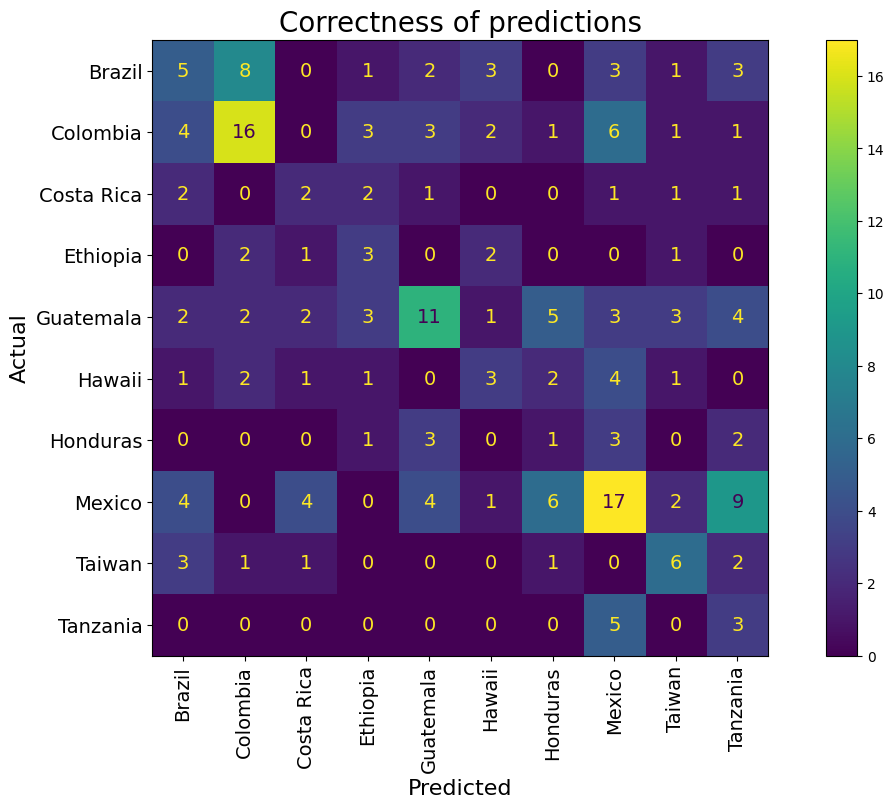

In [ ]:
get_score_and_cm(best_rfc, X_test, y_test)

Модель знову перенавчена, і знову вдвічі, я починю думати що проблема в нестачі даних. Цікаво що буде якщо я розіб'ю вибірки на 70-30% замість 80-20

#### Модель з нового розподілу

In [ ]:
# оновлений розподіл з усіма ознаками (але з більшою кілкістю тестових даних)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=13)

In [ ]:
# підбір моделі
best_rfc = get_best_model(rfc, rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3,
                       n_estimators=17, random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.70      0.72      0.71        92
    Colombia       0.72      0.65      0.68       127
  Costa Rica       0.63      0.81      0.71        36
    Ethiopia       0.67      0.90      0.77        31
   Guatemala       0.86      0.72      0.78       125
      Hawaii       0.63      0.75      0.68        51
    Honduras       0.54      0.92      0.68        36
      Mexico       0.85      0.59      0.70       165
      Taiwan       0.61      0.62      0.62        48
    Tanzania       0.52      0.96      0.67        28

    accuracy                           0.71       739
   macro avg       0.67      0.76      0.70       739
weighted avg       0.73      0.71      0.71       739



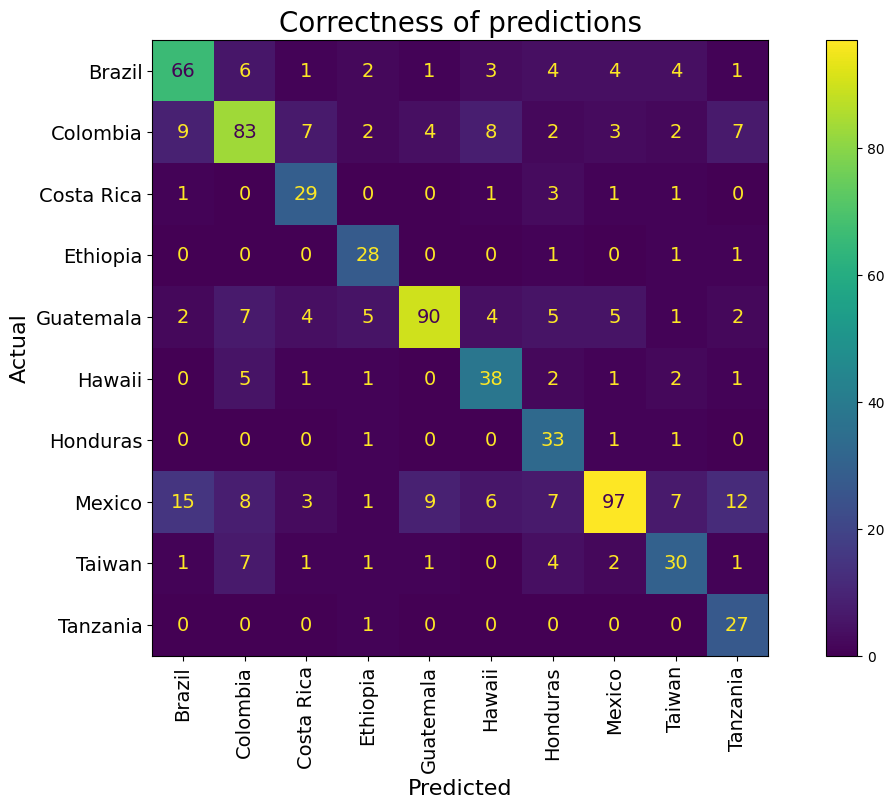

In [ ]:
get_score_and_cm(best_rfc, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.23      0.15      0.18        39
    Colombia       0.53      0.47      0.50        55
  Costa Rica       0.22      0.13      0.17        15
    Ethiopia       0.35      0.54      0.42        13
   Guatemala       0.35      0.28      0.31        54
      Hawaii       0.22      0.27      0.24        22
    Honduras       0.10      0.19      0.13        16
      Mexico       0.51      0.44      0.47        71
      Taiwan       0.16      0.19      0.17        21
    Tanzania       0.14      0.33      0.20        12

    accuracy                           0.33       318
   macro avg       0.28      0.30      0.28       318
weighted avg       0.35      0.33      0.33       318



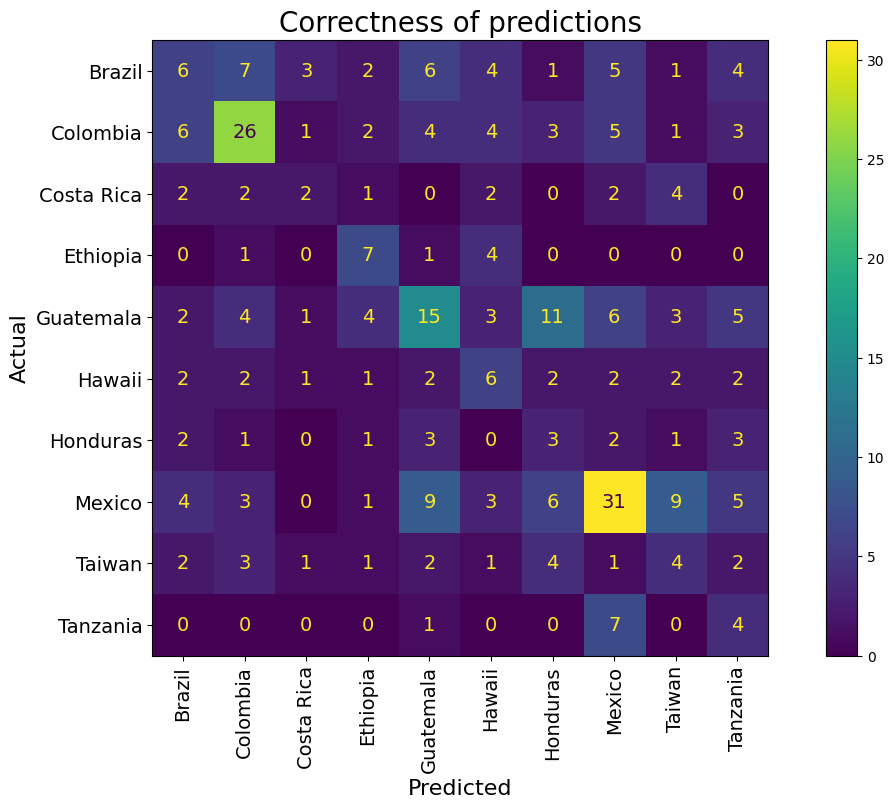

In [ ]:
get_score_and_cm(best_rfc, X_test, y_test)

На жаль перенавчання не пропало. В мене залишилась остання ідея, змінити гіперпараметри щоб спростити модель. Це можна зробити зменшивши максимальну глибину дерева, та збільшивши кількість записів для розбиття гілок

#### Модель з нових гіперпараметрів

In [ ]:
# поточні гіперпараметри
rfc_params

{'max_depth': range(2, 16),
 'min_samples_split': range(2, 11),
 'min_samples_leaf': range(2, 11),
 'n_estimators': range(5, 21)}

In [ ]:
new_rfc_params = {'max_depth': range(2, 11),
                  'min_samples_split': range(5, 11),
                  'min_samples_leaf': range(5, 11),
                  'n_estimators': range(1, 11)}

розподіл тренувальних та тестових даних залишу 70-30, оскільки виявилось що він не сильно рятує від перенавчання

In [ ]:
# підбір моделі
best_rfc = get_best_model(rfc, new_rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=10, random_state=13)

Тренувальні провалідовані дані

              precision    recall  f1-score   support

      Brazil       0.57      0.54      0.56        92
    Colombia       0.66      0.53      0.59       127
  Costa Rica       0.41      0.58      0.48        36
    Ethiopia       0.48      0.90      0.63        31
   Guatemala       0.81      0.59      0.69       125
      Hawaii       0.53      0.63      0.58        51
    Honduras       0.47      0.75      0.57        36
      Mexico       0.80      0.54      0.64       165
      Taiwan       0.46      0.54      0.50        48
    Tanzania       0.38      0.89      0.54        28

    accuracy                           0.59       739
   macro avg       0.56      0.65      0.58       739
weighted avg       0.65      0.59      0.60       739



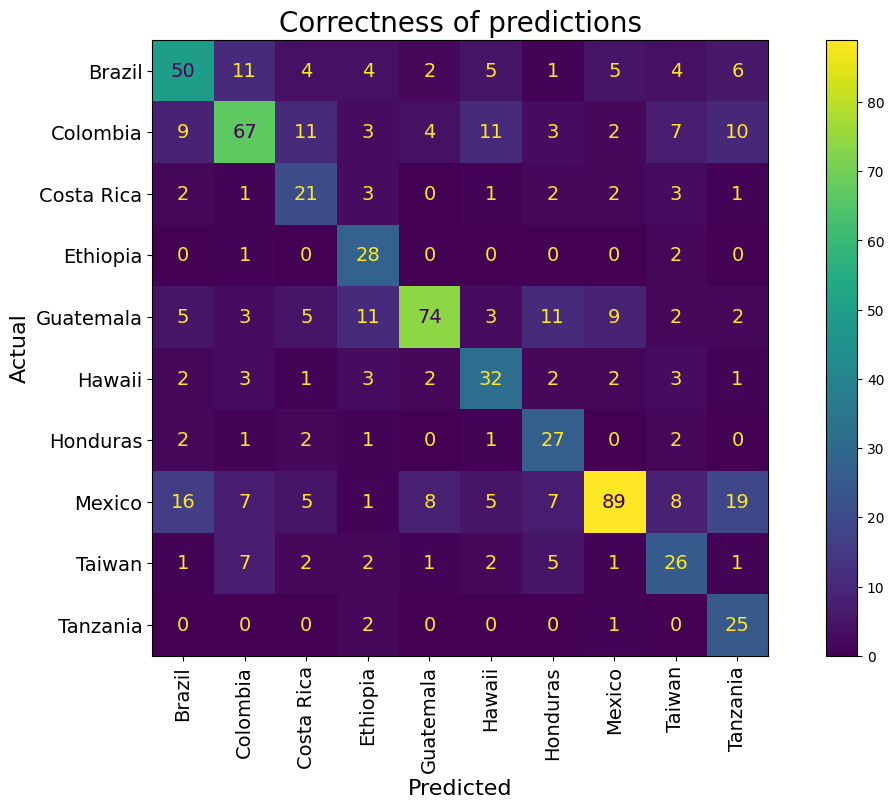

In [ ]:
get_score_and_cm(best_rfc, X_train, y_train)

Тестові дані

              precision    recall  f1-score   support

      Brazil       0.26      0.15      0.19        39
    Colombia       0.39      0.29      0.33        55
  Costa Rica       0.06      0.07      0.06        15
    Ethiopia       0.35      0.54      0.42        13
   Guatemala       0.37      0.26      0.30        54
      Hawaii       0.23      0.32      0.27        22
    Honduras       0.13      0.25      0.17        16
      Mexico       0.50      0.37      0.42        71
      Taiwan       0.17      0.24      0.20        21
    Tanzania       0.18      0.58      0.28        12

    accuracy                           0.29       318
   macro avg       0.26      0.31      0.27       318
weighted avg       0.33      0.29      0.30       318



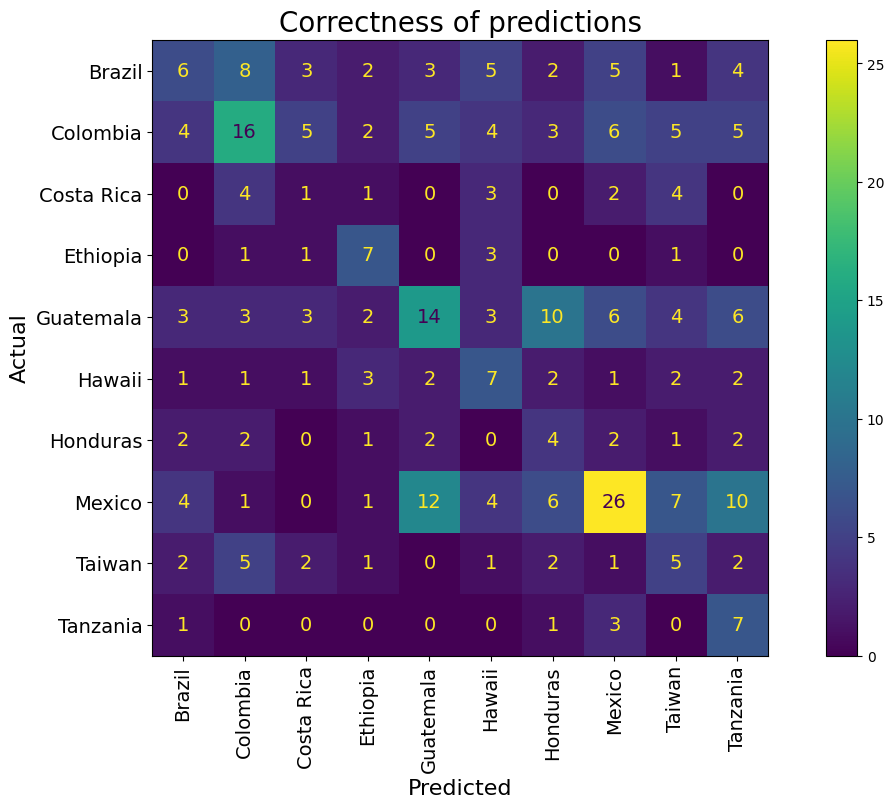

In [ ]:
get_score_and_cm(best_rfc, X_test, y_test)

Навіть нові гіперпараметри не допомогли уникнути перенавчання

### Модель 3. Support Vector Machine (SVM) лінійний варіант

Моделі базовані на деревах рішень показують перенавчання. Можливо це залежить не від типу моделі, а від малої кількості даних, але краще перевірити ще одну модель, і потім робити висновки

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(class_weight="balanced",
                verbose=True,
                random_state=13)

svm_params = {'C': [0.1, 1, 10], 
              'tol': [1, 0.1, 0.01, 0.001, 0.0001],
              'max_iter': range(31000, 51000, 5000)}

best_svm = get_best_model(svm, svm_params, X_train, y_train, 20)
best_svm

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

LinearSVC(C=1, class_weight='balanced', max_iter=41000, random_state=13,
          tol=0.001, verbose=True)

Тренувальні 

              precision    recall  f1-score   support

      Brazil       0.25      0.02      0.04        92
    Colombia       0.44      0.47      0.45       127
  Costa Rica       0.21      0.22      0.22        36
    Ethiopia       0.23      0.74      0.35        31
   Guatemala       0.45      0.63      0.53       125
      Hawaii       0.26      0.16      0.20        51
    Honduras       0.50      0.03      0.05        36
      Mexico       0.47      0.45      0.46       165
      Taiwan       0.25      0.02      0.04        48
    Tanzania       0.20      0.64      0.31        28

    accuracy                           0.37       739
   macro avg       0.33      0.34      0.26       739
weighted avg       0.37      0.37      0.33       739



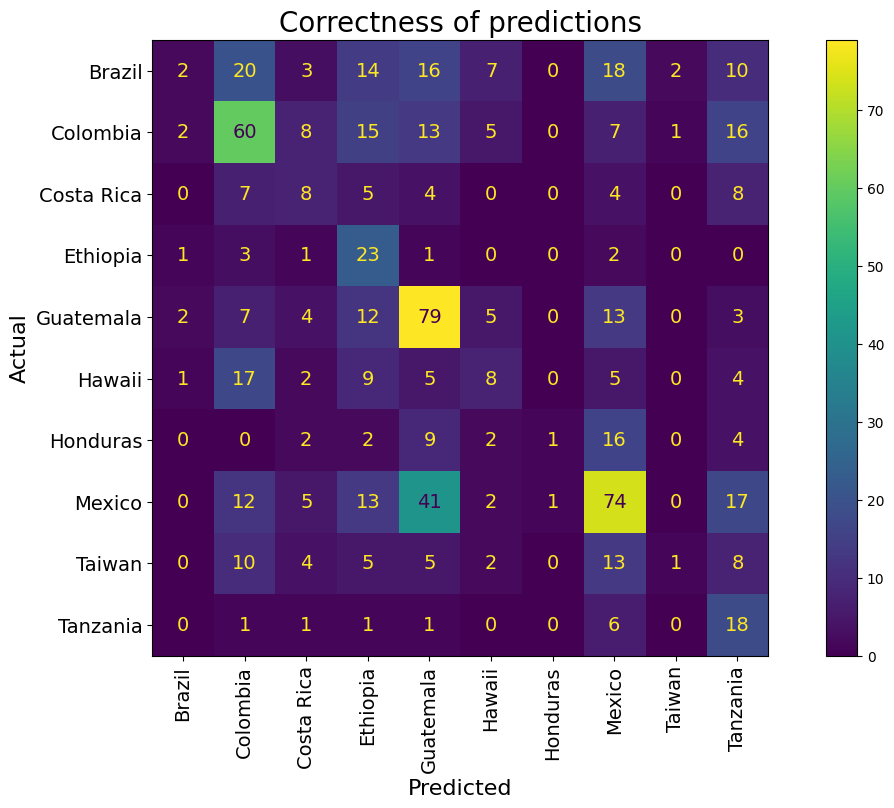

In [ ]:
get_score_and_cm(best_svm, X_train, y_train)

Тестові

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Brazil       0.25      0.05      0.09        39
    Colombia       0.29      0.31      0.30        55
  Costa Rica       0.33      0.20      0.25        15
    Ethiopia       0.25      0.77      0.38        13
   Guatemala       0.35      0.46      0.40        54
      Hawaii       0.15      0.09      0.11        22
    Honduras       0.00      0.00      0.00        16
      Mexico       0.45      0.46      0.46        71
      Taiwan       0.00      0.00      0.00        21
    Tanzania       0.20      0.75      0.32        12

    accuracy                           0.32       318
   macro avg       0.23      0.31      0.23       318
weighted avg       0.29      0.32      0.28       318



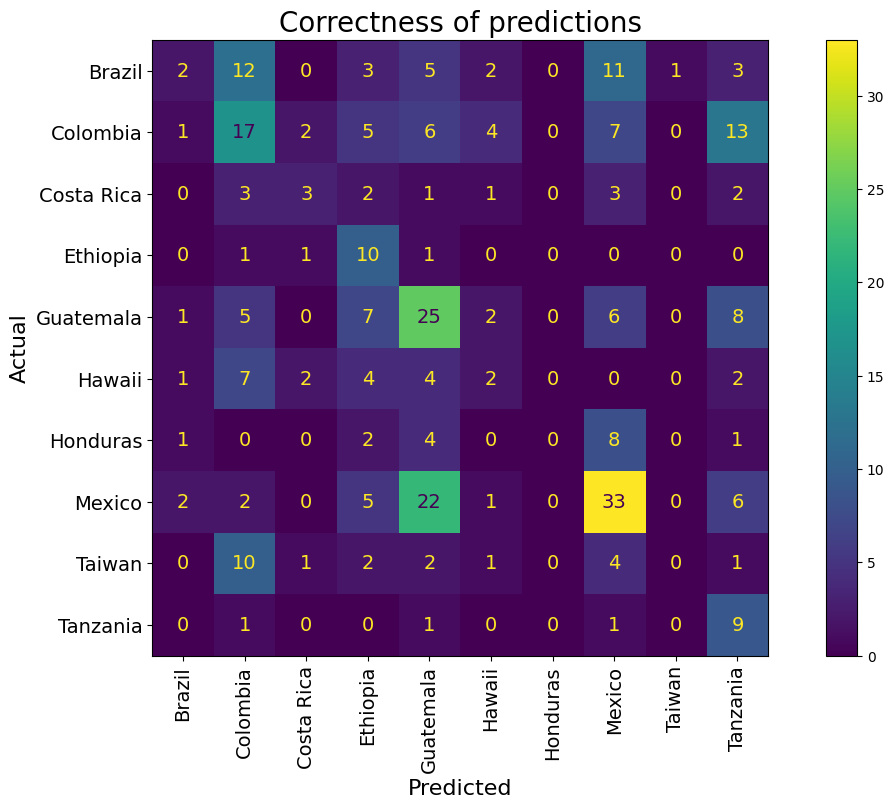

In [ ]:
get_score_and_cm(best_svm, X_test, y_test)

Видно що векторна модель не справляється з цією задачею, видно чітке недонавчання (~31% точність на обох датасетах, і це враховуючи що точність зазвичай завищена при нерівномірному розподілі)

Оскільки векторний підхід показує себе в рази гірше за дерево рішень, а моделі засновані на деревах рішень показують пряме перенавчання я спробую ще одну стратегію, бустинг, а саме GradientBoost

### Модель (Ансамбль) 4. GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_params = params.copy()
grad_params["n_estimators"] = [1, 5, 10, 15, 20]

gradient_clf = GradientBoostingClassifier(random_state=13)

# підбір моделі
best_grad = get_best_model(gradient_clf, grad_params, X_train, y_train)
best_grad

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GradientBoostingClassifier(max_depth=6, min_samples_leaf=10,
                           min_samples_split=4, n_estimators=10,
                           random_state=13)

Тренувальні дані

              precision    recall  f1-score   support

      Brazil       0.66      0.47      0.55        92
    Colombia       0.60      0.83      0.70       127
  Costa Rica       0.91      0.56      0.69        36
    Ethiopia       0.81      0.68      0.74        31
   Guatemala       0.66      0.77      0.71       125
      Hawaii       0.77      0.53      0.63        51
    Honduras       0.74      0.47      0.58        36
      Mexico       0.65      0.79      0.72       165
      Taiwan       0.84      0.44      0.58        48
    Tanzania       0.79      0.54      0.64        28

    accuracy                           0.67       739
   macro avg       0.74      0.61      0.65       739
weighted avg       0.69      0.67      0.67       739



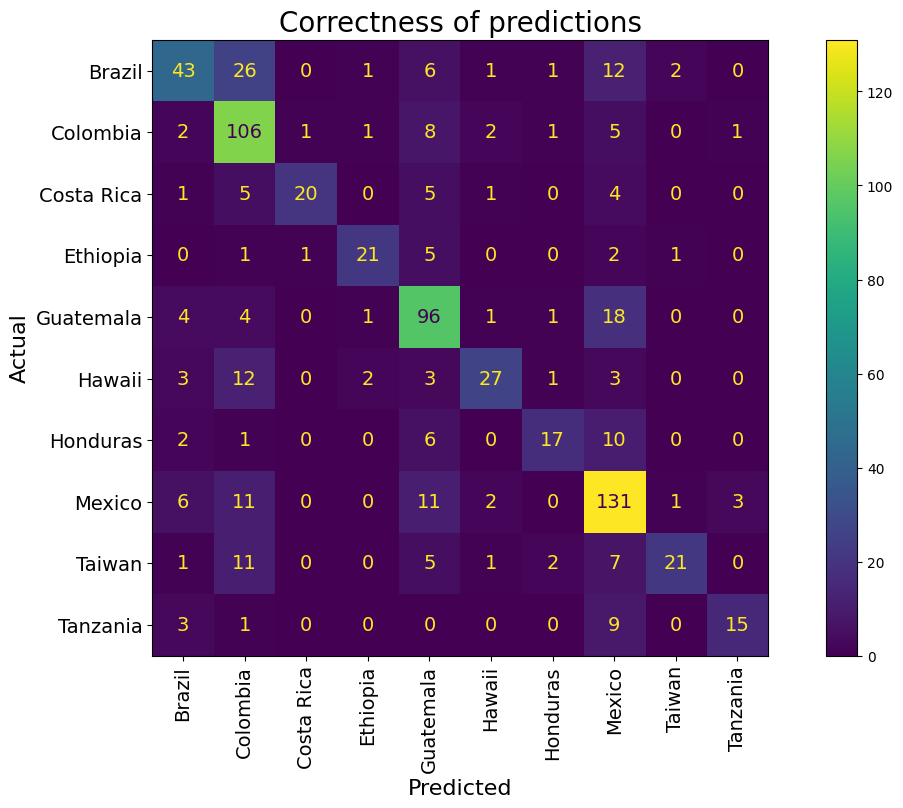

In [ ]:
boost_pred = best_grad.predict(X_train)

# оцінки моделі
print(classification_report(y_train, boost_pred))

# матриця помилок
plot_confusion_matrix(best_grad, y_train, boost_pred)

Тестові дані

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Brazil       0.27      0.18      0.22        39
    Colombia       0.48      0.71      0.57        55
  Costa Rica       0.00      0.00      0.00        15
    Ethiopia       0.40      0.31      0.35        13
   Guatemala       0.41      0.43      0.42        54
      Hawaii       0.33      0.32      0.33        22
    Honduras       0.14      0.06      0.09        16
      Mexico       0.45      0.62      0.52        71
      Taiwan       0.38      0.14      0.21        21
    Tanzania       0.27      0.25      0.26        12

    accuracy                           0.41       318
   macro avg       0.31      0.30      0.30       318
weighted avg       0.37      0.41      0.38       318



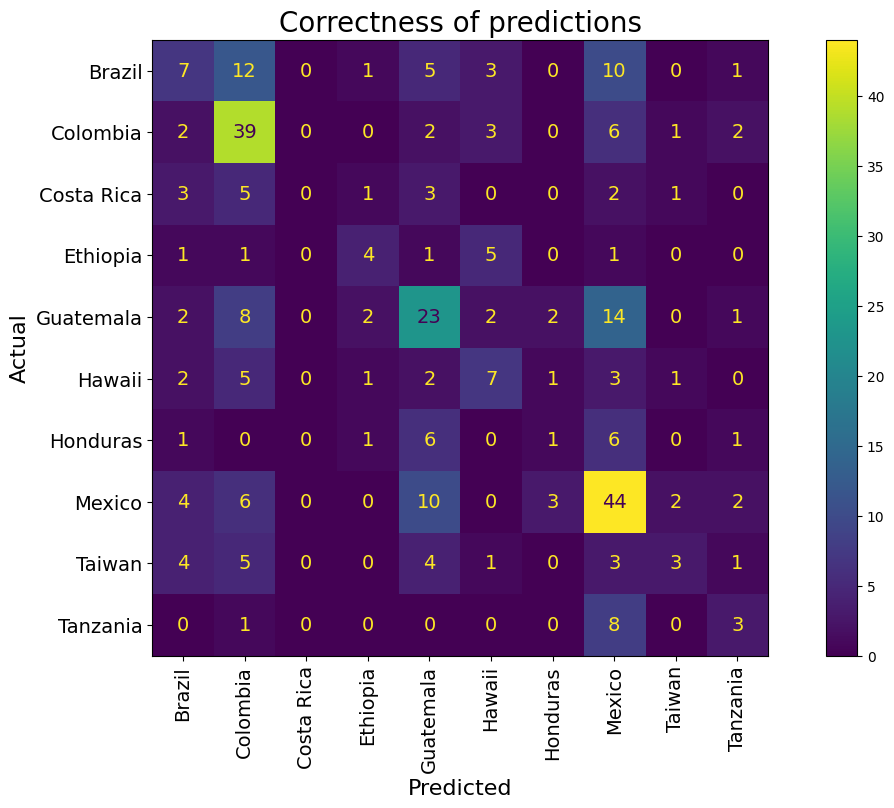

In [ ]:
boost_pred = best_grad.predict(X_test)

# оцінки моделі
print(classification_report(y_test, boost_pred))

# матриця помилок
plot_confusion_matrix(best_grad, y_test, boost_pred)

Ну що ж, уникнути перенавчання мені так і не вдалось, один з класів (Коста Ріка) не була передбачена в тестових даних взагалі, але при цьому weighted avg f1-score є найбільшим в порівнянні з 25-30% раніше. Буду вважати цю міні-успіхом, і водночас Коста Ріка ненависником.

# Висновок

В цій роботі я намагався класифікувати походження кавового зерна. Я знайшов дані. Провів чистку даних, вибір ознак та створив декілька моделей. На жаль жодна з них не дала бажаного результат. Більшість з них були перенавчені, незважаючи щоб я не робив. Думаю щоб моделі працювали треба банально більше даних.